<h1>Part 2: Code Quiz<h1>

### <b>Study Case</b>
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model to predict if a patient has this disease or not. We will use SVC (SVM for classification) and 
Decision Tree (ID3) algorithms.

### Download the data from here: 
https://drive.google.com/file/d/1NUSiCOcClcrPOH8ClMYK6Dp6p-7evNTv/view?usp=sharing


### <b>ABOUT DATASET: </b>

1. age
2. sex (1= Male, 0= Female)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


The "AHD" field refers to the presence of heart disease in the patient, the value is No and Yes.


## Weight 10%

In [ ]:
#1 import all libraries required : (e.g: numpy and pandas, sklearn, matplotlib, etc)


In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sb

In [34]:
#2 Import dataset into variabel


In [35]:
df = pd.read_csv("Heart.csv")

In [36]:
#3 shows attributes, number of data and the data types for each attributes 
# AHD is Acquired heart diseases ~ later will be used as "TARGET Class"


In [37]:
print (df.dtypes)

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object


In [38]:
#4 remove column 'Unnamed: 0'
del df['Unnamed: 0']

In [39]:
#5 print 'Data First 5 Rows Show'

In [40]:
print(df.iloc[:5])

   Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0      normal  Yes  
2      2  2.0  reversable  Yes  
3      3  0.0      normal   No  
4      1  0.0      normal   No  


In [41]:
#6 print 'Data Last 5 Rows Show'


In [42]:
print(df.iloc[-5:])

     Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
298   45    1       typical     110   264    0        0    132      0   
299   68    1  asymptomatic     144   193    1        0    141      0   
300   57    1  asymptomatic     130   131    0        0    115      1   
301   57    0    nontypical     130   236    0        2    174      0   
302   38    1    nonanginal     138   175    0        0    173      0   

     Oldpeak  Slope   Ca        Thal  AHD  
298      1.2      2  0.0  reversable  Yes  
299      3.4      2  2.0  reversable  Yes  
300      1.2      2  1.0  reversable  Yes  
301      0.0      2  1.0      normal  Yes  
302      0.0      1  NaN      normal   No  


In [43]:
#7 print the statistic of the dataset (count, mean, SD, min, max, etc )


In [80]:

df[["Age", "Sex", "RestBP", "Chol", "Fbs", "RestECG", "MaxHR", "ExAng", "Oldpeak", "Slope", "Ca"]].describe()



,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768
std,9.049736,0.468500,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [45]:
#8 check null on all data and If data has null, by sum of null data's


In [46]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [47]:
#9 Try removing all the rows from the dataset that contain missing values. How many are left?


In [48]:
df = df.dropna(how='any',axis=0) 

In [49]:
#10 Show statistical correlation value from each column using SNS heatmap


              Age       Sex    RestBP      Chol       Fbs   RestECG     MaxHR  \
Age      1.000000 -0.092399  0.290476  0.202644  0.132062  0.149917 -0.394563   
Sex     -0.092399  1.000000 -0.066340 -0.198089  0.038850  0.033897 -0.060496   
RestBP   0.290476 -0.066340  1.000000  0.131536  0.180860  0.149242 -0.049108   
Chol     0.202644 -0.198089  0.131536  1.000000  0.012708  0.165046 -0.000075   
Fbs      0.132062  0.038850  0.180860  0.012708  1.000000  0.068831 -0.007842   
RestECG  0.149917  0.033897  0.149242  0.165046  0.068831  1.000000 -0.072290   
MaxHR   -0.394563 -0.060496 -0.049108 -0.000075 -0.007842 -0.072290  1.000000   
ExAng    0.096489  0.143581  0.066691  0.059339 -0.000893  0.081874 -0.384368   
Oldpeak  0.197123  0.106567  0.191243  0.038596  0.008311  0.113726 -0.347640   
Slope    0.159405  0.033345  0.121172 -0.009215  0.047819  0.135141 -0.389307   
Ca       0.362210  0.091925  0.097954  0.115945  0.152086  0.129021 -0.268727   

            ExAng   Oldpeak

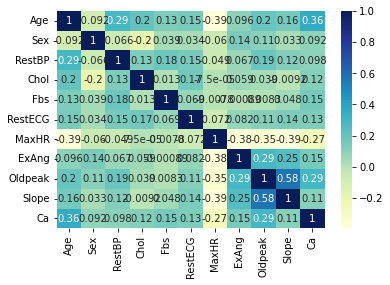

In [56]:
print(df.corr())
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

##*Lets* do some attribute analysis - Age Analysis (Weight 20%)



In [60]:
#11 Print variance age data from dataset
print (df["Age"].var())

81.89771589771594


In [98]:
#12 Please divide data into three groups: the elderly (>55yo),middle-aged(40-55yo), young(<40yo) people by looking at the age ranges.
Elderly = df[df['Age'] > 55]
print(Elderly)
#MiddleAged = df[55>df['Age'] > 40]
#print(MiddleAged)
Young = df[df['Age'] <40]
print(Young)

     Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
0     63    1       typical     145   233    1        2    150      0   
1     67    1  asymptomatic     160   286    0        2    108      1   
2     67    1  asymptomatic     120   229    0        2    129      1   
5     56    1    nontypical     120   236    0        0    178      0   
6     62    0  asymptomatic     140   268    0        2    160      0   
..   ...  ...           ...     ...   ...  ...      ...    ...    ...   
296   59    1  asymptomatic     164   176    1        2     90      0   
297   57    0  asymptomatic     140   241    0        0    123      1   
299   68    1  asymptomatic     144   193    1        0    141      0   
300   57    1  asymptomatic     130   131    0        0    115      1   
301   57    0    nontypical     130   236    0        2    174      0   

     Oldpeak  Slope   Ca        Thal  AHD  
0        2.3      3  0.0       fixed   No  
1        1.5      2  3.0      norma

In [102]:
#13 Show the data count for each age based on their groups: elderly, middle-aged, young people and please show it in a Bar Plot
print("YoungCount")
print (Young.count())
print("Elderlycount")
print (Elderly.count())

YoungCount
Age          14
Sex          14
ChestPain    14
RestBP       14
Chol         14
Fbs          14
RestECG      14
MaxHR        14
ExAng        14
Oldpeak      14
Slope        14
Ca           14
Thal         14
AHD          14
dtype: int64
Elderlycount
Age          151
Sex          151
ChestPain    151
RestBP       151
Chol         151
Fbs          151
RestECG      151
MaxHR        151
ExAng        151
Oldpeak      151
Slope        151
Ca           151
Thal         151
AHD          151
dtype: int64


In [ ]:
#14 add a new column 'AgeRange' and put the correct value based on the age category. Then plot a categorical scatterplot to show each observation. Your chart will show something like this



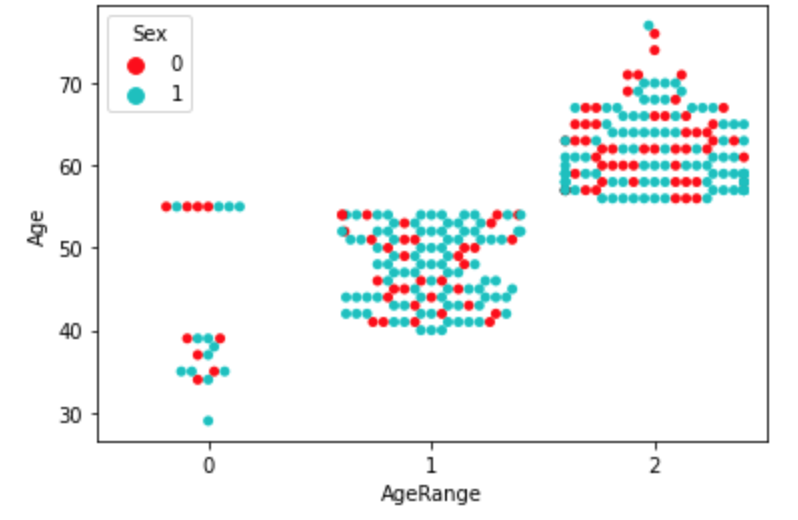

In [ ]:
#15 Show 'Age Range' value distributions in Pie Chart


## **MODEL, TRAINING and TESTING (Weight 30%)**

As a result of our initial evaluations, we have used a number of artificial learning algorithms. support vector machine (SVM) and Decision Trees algorithms. To implement this algorithm model, we need to separate dependent and independent variables within our data sets. In addition, we created a combination of features between different features to make different experiments. While creating these parameters, the process of finding the best results was made by giving hyper parameter values.

As is known, most of our data are categorized and not categorized only among certain feature values. We will perform scale operations to eliminate these situations.

In a data set, the data that are distant from each other are made to scale between each other by making a specific scaling. As a result of this operation, the data takes a value of 0.1. This may change in some scaling operations. Standard and Normalization scale will be used for our operation. There is a big change between the data obtained. Therefore, we need to use this method for SVM algorithm.

In [97]:
#16 Some of the data is still in string, so we need to change it to numeric (ChestPain, Thal, and AHD)
df['ChestPain'] = df['ChestPain'].astype(int)

ValueError: invalid literal for int() with base 10: 'typical'

In [ ]:
#17 Please show the statistical correlation value (Hint: use function corr) amongst all the columns in the dataset


The diagonal values we see in these correlation values are always 1.0. That doesn't mean much to us. The minus value is a big problem, but the value of the transactions are more valuable for us.

In [ ]:
#18 Please normalize the data (hint: use StandardScaler)


The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it.

In [ ]:
#19 Split dataset into two subsets: train and test sets (Train: 67%, Test: 33%)


## Optional steps for Extra Point (additional extra point Weight 20%)




This is ***OPTIONAL STEPs*** to improve accuracy of your model

 implement PCA to the data set.

But, before that, I will investigate the explained variance ratio and resulting principal components:

In [ ]:
#* investigate the explained variance ratio and resulting principal components


In [ ]:
#* apply PCA to the data with number of components = 8 for X_train


In [ ]:
#* apply PCA to the data with number of components = 8 for X_test


According to the principal components, data points with greater values on the x-axis represent the customers that are less likely to spend to Detergents_Paper category.

Likewise, data points with greater values on the y-axis represent the customers that are less likely to spend to Fresh and Frozen categories.

Now, you can constitute a DataFrame out of my reduced data with two dimensions:

In [ ]:
#*  create combine feature list for training the model based on reduced data (optional steps that can be used for training SVM and Decision Tree Models)


##Lets create the training Model and test the performance

**SVM**

In [ ]:
# Please import all required library for SVM (Classification)
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import datasets

In [ ]:
# 20 
# Build an SVM model, train it on train data and test it on test data. Please print Train Classification Report and Confusion Matrix.
# Don't forget to setup random_state to compare the same data with other model later (Decision Tree)


**Decision Tree**

In [ ]:
# Please import all required library for DecisionTreeClassifier 

In [ ]:
# 21 
# Build a Decision Tree model, train it on train data and test it on test data. Please print Train Classification Report and Confusion Matrix.
# Don't forget to setup same random_state 

**Last thing, What you could conclude with this analysis?**

Please summarize your finding from these model performance